In [ ]:
# Packages

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt

#Encoding packages

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [6]:
# reading the 1990 to 1999
df_1= pd.read_csv(r"/content/drive/MyDrive/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df_1.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000


In [7]:
# reading the 2000 to 2012
df_2= pd.read_csv(r"/content/drive/MyDrive/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df_2.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0
369650,2012-02,YISHUN,EXECUTIVE,293,YISHUN ST 22,04 TO 06,163.0,Apartment,1992,630000.0


In [8]:
# reading the 2012 to 2014
df_3= pd.read_csv(r"/content/drive/MyDrive/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df_3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0


In [10]:
# reading the 2015 to 2016
df_4= pd.read_csv(r"/content/drive/MyDrive/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_4.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0
37152,2016-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,70,735000.0


In [11]:
# reading the 2017 to onwards
df_5= pd.read_csv(r"/content/drive/MyDrive/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df_5.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


In [12]:
#df_1,df_2,df_3 does not have a "remaining_lease" column so, I choose the df_4 and df_5 only

#concadinating the df_4 and df_5

df_6= pd.concat([df_4,df_5],axis= 0)
df_6.reset_index(drop= True, inplace= True)
df_6.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
221078,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,60 years 03 months,770000.0
221079,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,60 years 02 months,800000.0


In [13]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221080 entries, 0 to 221079
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                221080 non-null  object 
 1   town                 221080 non-null  object 
 2   flat_type            221080 non-null  object 
 3   block                221080 non-null  object 
 4   street_name          221080 non-null  object 
 5   storey_range         221080 non-null  object 
 6   floor_area_sqm       221080 non-null  float64
 7   flat_model           221080 non-null  object 
 8   lease_commence_date  221080 non-null  int64  
 9   remaining_lease      221080 non-null  object 
 10  resale_price         221080 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.6+ MB


In [15]:
# This Dataset have not any null values
df_6.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [16]:
df_6.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [17]:
# Creating a new column "address"
df_6["address"]= df_6["block"]+" "+df_6["street_name"]

In [18]:
#droping the "street_name" and "block"
df_7= df_6.drop(columns=["block","street_name"])

In [19]:
df_7.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10


In [20]:
# for month
df_7["month"] = pd.to_datetime(df_7["month"], format="%Y-%m")

In [21]:
#spliting the month column to "Year", "month", "day"
df_7["year"]= df_7["month"].dt.year
df_7["month"]= df_7["month"].dt.month

In [22]:
df_7.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [23]:
df_7["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [24]:
df_7["town"].nunique()

26

In [25]:
df_7["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [26]:
df_7["flat_type"].nunique()

7

In [27]:
df_7["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [28]:
df_7["flat_model"].nunique()

21

In [29]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_7["town"]= LabelEncoder().fit_transform(df_7["town"])
df_7["flat_model"]= OrdinalEncoder().fit_transform(df_7[["flat_model"]])
df_7["flat_type"]= OrdinalEncoder().fit_transform(df_7[["flat_type"]])

In [30]:
df_7["town"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [31]:
df_7["flat_type"].unique()

array([2., 3., 4., 1., 5., 0., 6.])

In [32]:
df_7["flat_model"].unique()

array([ 5., 12.,  8., 17., 16., 13.,  7.,  3., 10., 19., 20.,  2., 18.,
        4.,  9., 15., 11., 14.,  6.,  0.,  1.])

In [33]:
df_7.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
221078,7,25,5.0,01 TO 03,146.0,7.0,1985,60 years 03 months,770000.0,277 YISHUN ST 22,2024
221079,7,25,5.0,04 TO 06,146.0,7.0,1985,60 years 02 months,800000.0,277 YISHUN ST 22,2024


In [34]:
df_7[["storey_start", "storey_end"]]= df_7["storey_range"].str.split(" TO ",expand=True)

In [35]:
#droping the "storey_range" column
df_7.drop(columns=["storey_range"],inplace= True)

In [36]:
df_7.head(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09
1,1,0,2.0,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,01,03


In [37]:
df_7["address"].nunique()

9593

In [38]:
df_7

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09
1,1,0,2.0,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,01,03
2,1,0,2.0,69.0,12.0,1980,64,285000.0,163 ANG MO KIO AVE 4,2015,01,03
3,1,0,2.0,68.0,12.0,1979,63,290000.0,446 ANG MO KIO AVE 10,2015,01,03
4,1,0,2.0,68.0,12.0,1980,64,290000.0,557 ANG MO KIO AVE 10,2015,07,09
...,...,...,...,...,...,...,...,...,...,...,...,...
221075,7,25,5.0,148.0,7.0,1988,63 years 04 months,830800.0,406 YISHUN AVE 6,2024,04,06
221076,7,25,5.0,142.0,3.0,1988,63 years 03 months,838000.0,406 YISHUN AVE 6,2024,10,12
221077,7,25,5.0,147.0,3.0,1987,62 years 03 months,820000.0,792 YISHUN RING RD,2024,07,09
221078,7,25,5.0,146.0,7.0,1985,60 years 03 months,770000.0,277 YISHUN ST 22,2024,01,03


In [39]:
# Address have 9593 unique values in the 221080 , so i encode it for the correlation checking
# I chooshing the "LabelEncoder" for the "address" column

df_7["address"]= LabelEncoder().fit_transform(df_7["address"])

In [40]:
df_7["storey_start"]= df_7["storey_start"].astype(int)
df_7["storey_end"]= df_7["storey_end"].astype(int)

In [41]:
# "remaining_lease" have a "60 years 8 months" this type of data ,
# so we want to split the year and month separately for the correlation checking
slice_values= []
for i in df_7["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [42]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])

In [43]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [44]:
#droping the "remaining_lease" column
df_7.drop(columns=["remaining_lease"],inplace= True)

In [45]:
df_8= pd.concat([df_7,df_data],axis=1)

In [46]:
df_8.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [47]:
# set the columns
df_9= df_8[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address',
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [48]:
df_10=df_9.sort_values(by=["year","month"])

In [49]:
df_10.to_csv("ResaleFlatPrices.csv", index= False)

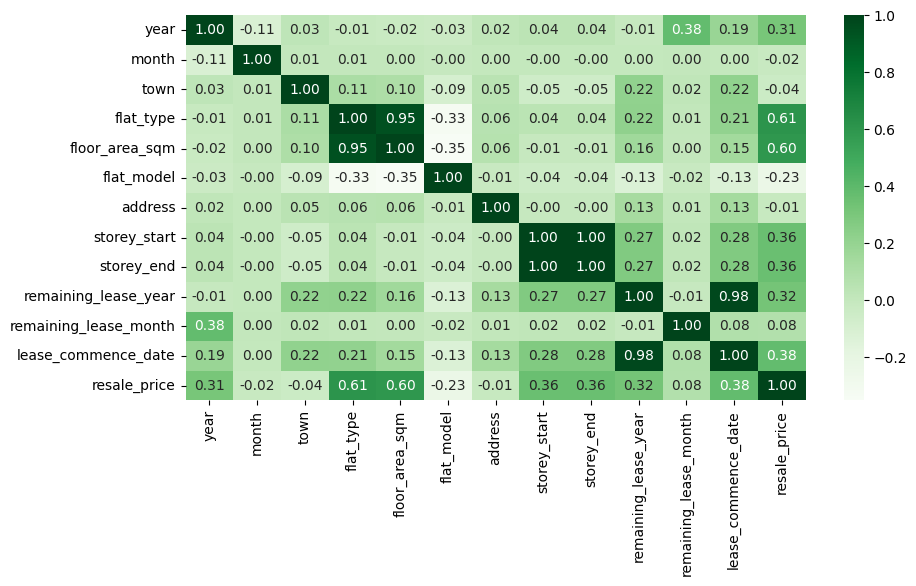

In [50]:
# Checking the Correlation using heatmap

df_10_corr= df_10.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_10_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [51]:
df_final= pd.read_csv(r"/content/ResaleFlatPrices.csv")
df_final.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1636,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6598,1,3,65,0,1981,275000.0


In [52]:
# checking the duplicate values
df_final.duplicated().sum()

312

In [53]:
df_final_1= df_final.drop_duplicates()
df_final_1.reset_index(drop= True, inplace= True)

In [54]:
df_final_1.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
220766,2024,7,25,5.0,146.0,7.0,3284,1,3,60,3,1985,770000.0
220767,2024,7,25,5.0,146.0,7.0,3284,4,6,60,2,1985,800000.0


In [56]:
# The month,address column does have very lowest correlation with other features
# So I drop the month and address columns
df_final_2= df_final_1.drop(columns=["month","address"])

In [57]:
df_final_2.tail(2)

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
220766,2024,25,5.0,146.0,7.0,1,3,60,3,1985,770000.0
220767,2024,25,5.0,146.0,7.0,4,6,60,2,1985,800000.0


In [58]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

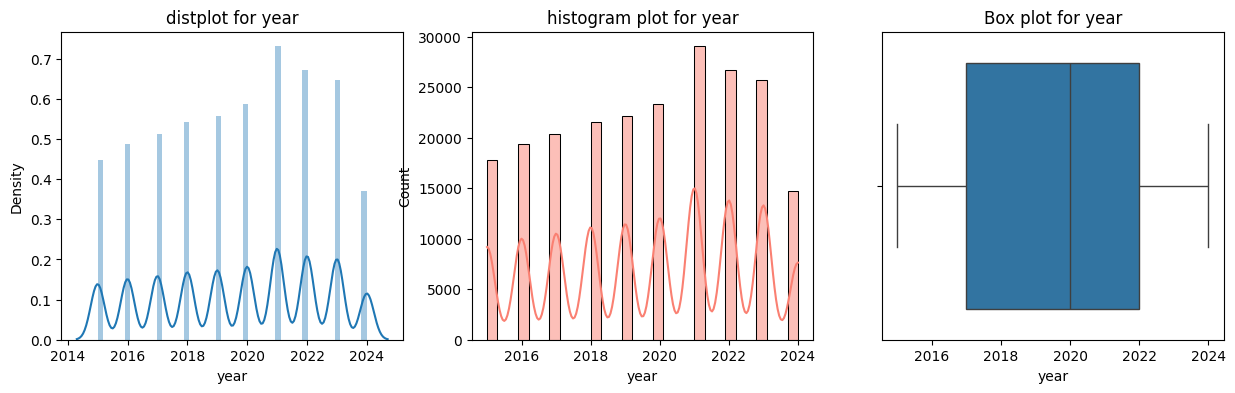

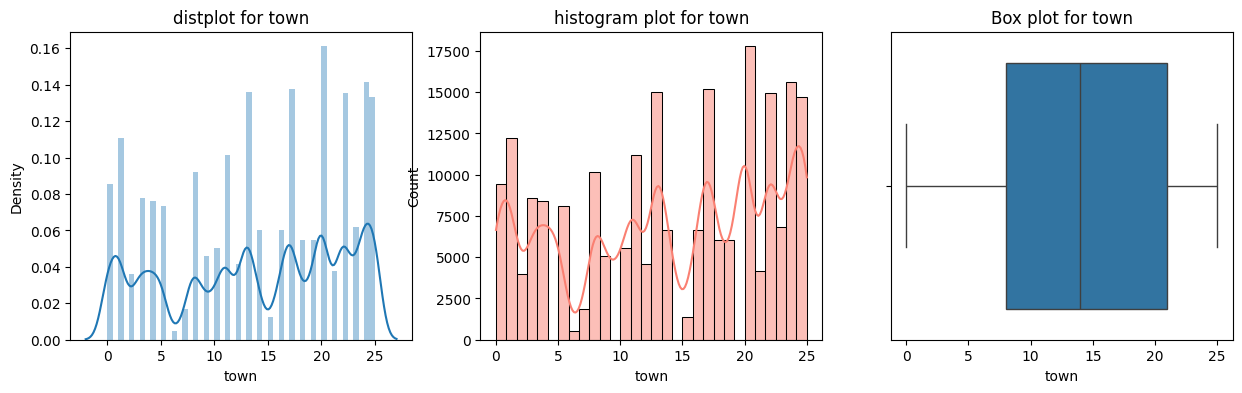

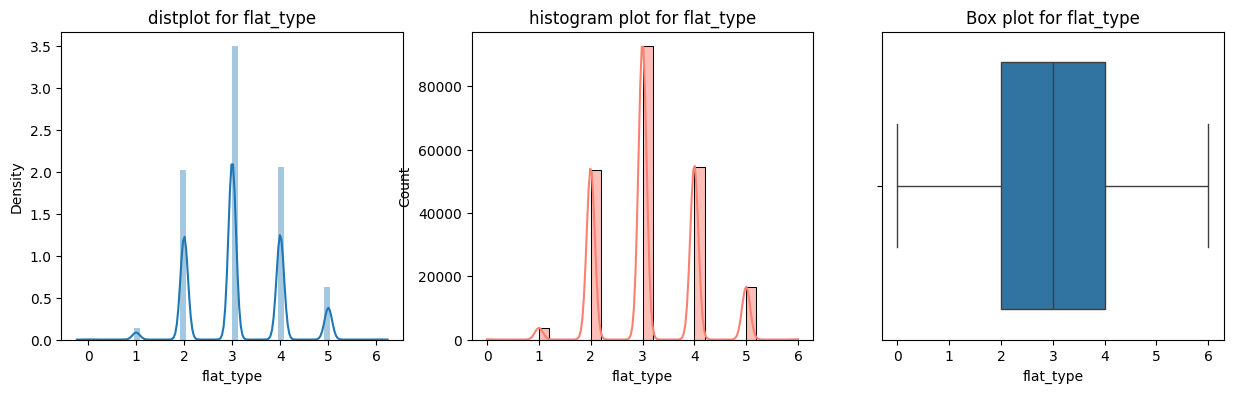

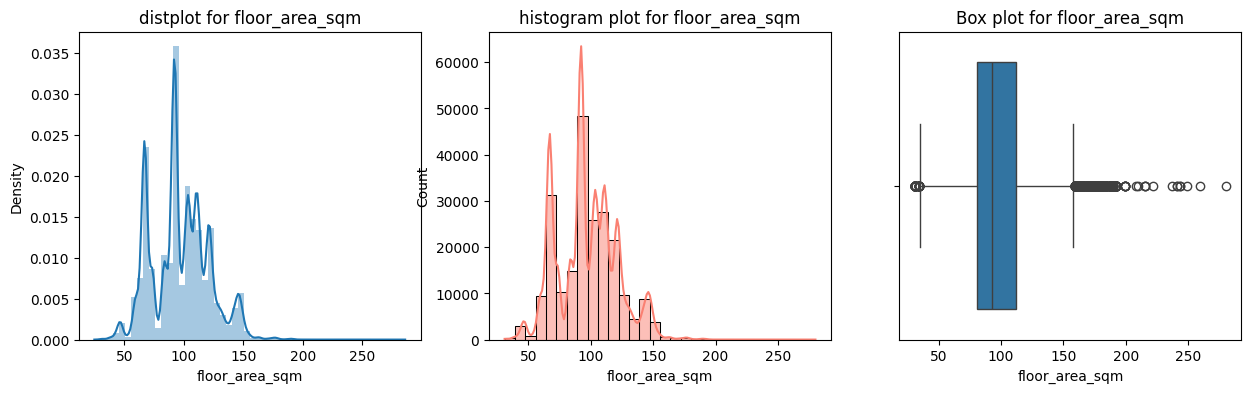

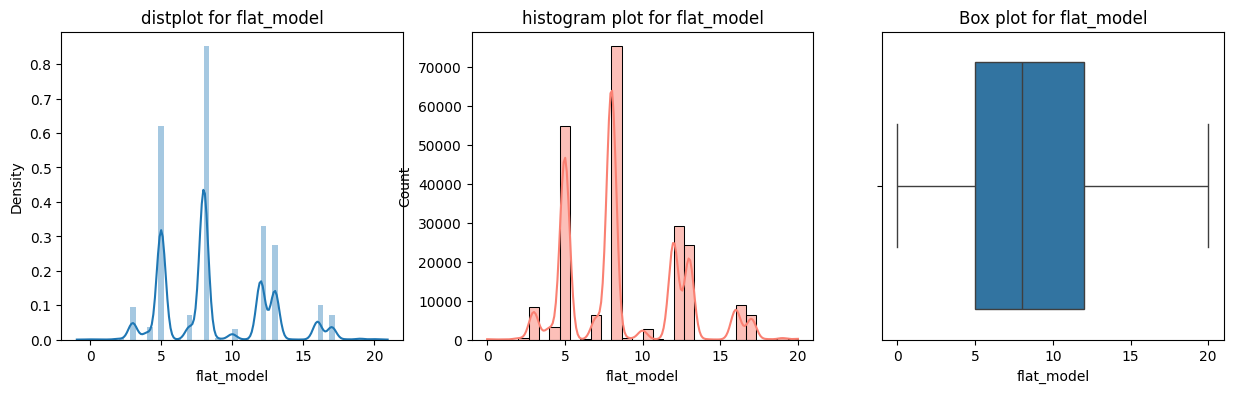

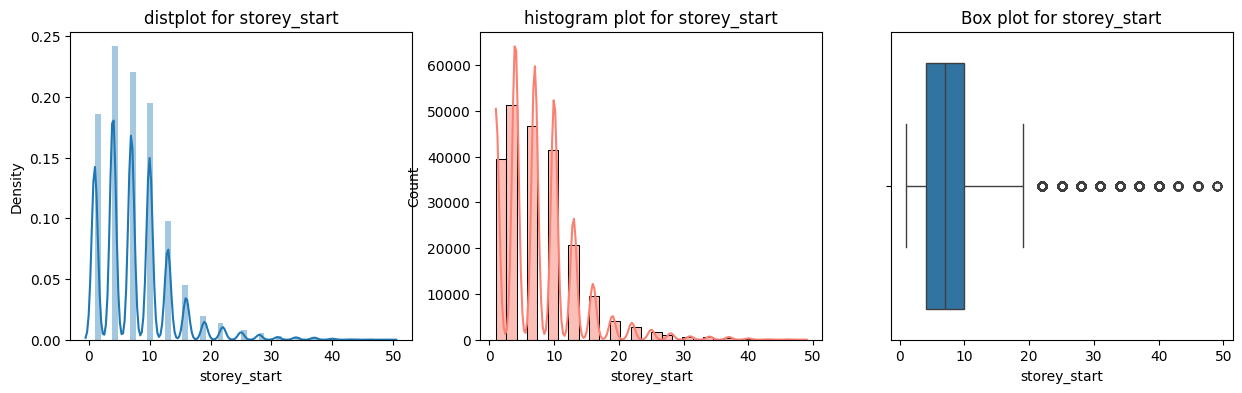

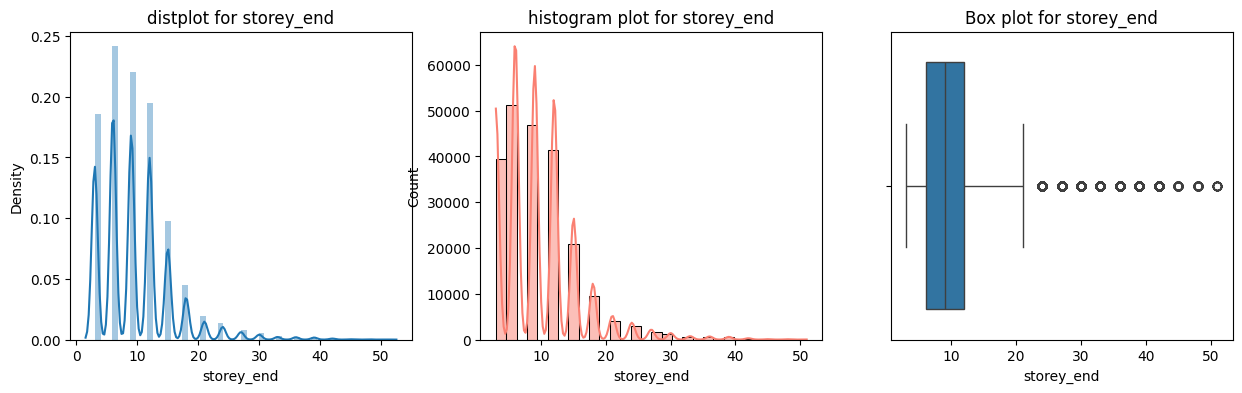

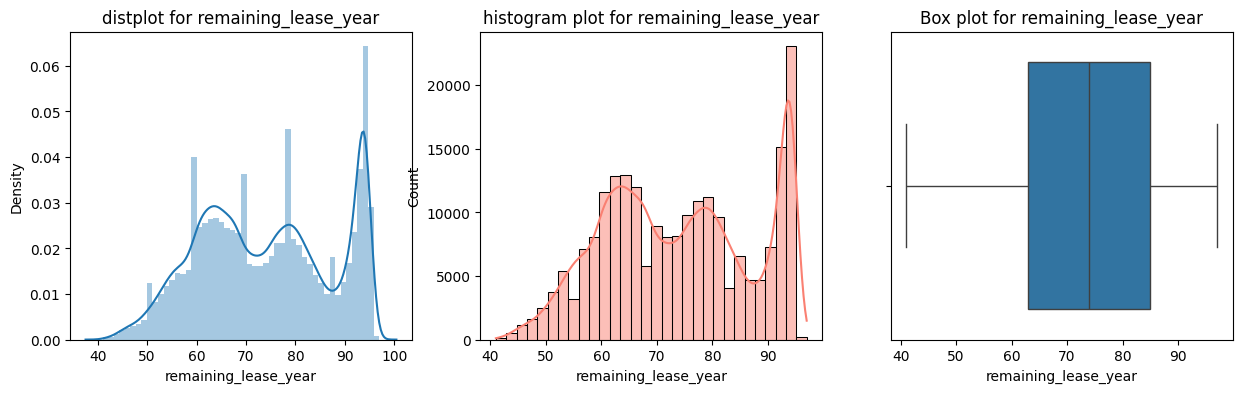

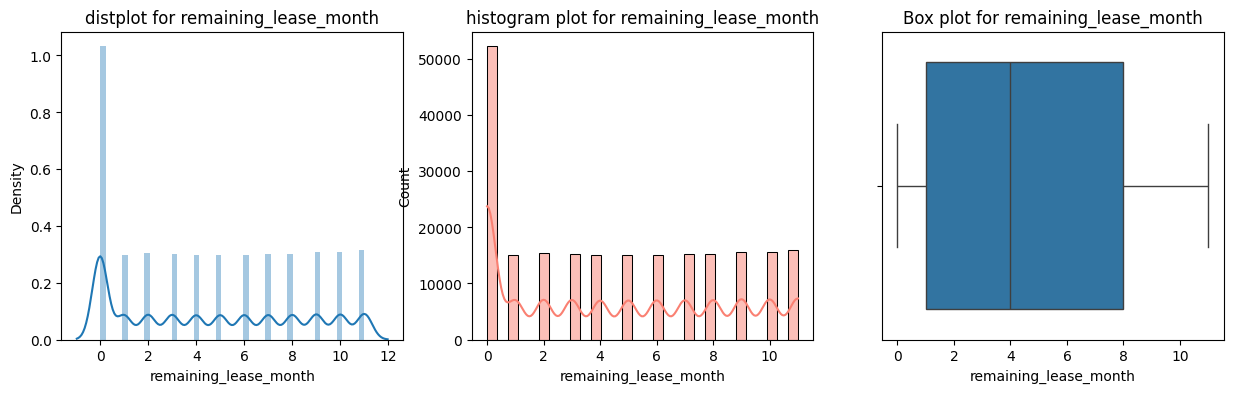

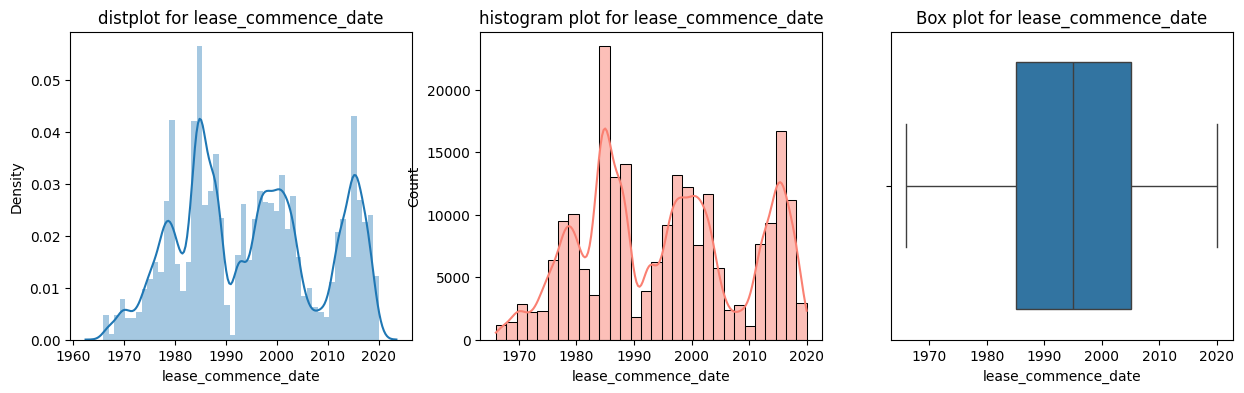

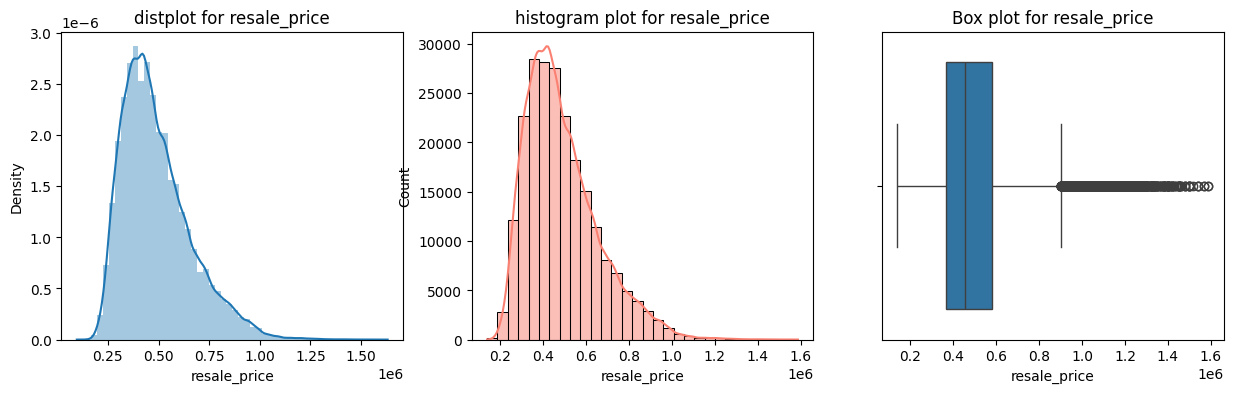

In [59]:
for i in df_final_2.columns:
    plot(df_final_2,i)

In [60]:
df_final_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,220768.0,2019.665685,2.712664,2015.0,2017.0,2020.0,2022.0,2024.0
town,220768.0,13.890029,7.956663,0.0,8.0,14.0,21.0,25.0
flat_type,220768.0,3.120004,0.919474,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,220768.0,97.109440,24.062383,31.0,81.0,93.0,112.0,280.0
flat_model,220768.0,8.689199,3.644488,0.0,5.0,8.0,12.0,20.0
storey_start,220768.0,7.660897,5.844660,1.0,4.0,7.0,10.0,49.0
storey_end,220768.0,9.660897,5.844660,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,220768.0,74.083776,13.505931,41.0,63.0,74.0,85.0,97.0
remaining_lease_month,220768.0,4.612050,3.779514,0.0,1.0,4.0,8.0,11.0
lease_commence_date,220768.0,1995.182884,13.711887,1966.0,1985.0,1995.0,2005.0,2020.0


In [61]:
df_final_3= df_final_2.copy()

In [62]:
# The Skewness Columns are
# 2. storey_start
# 3. storey_end
# 4. resale_price
df_final_3["storey_start"]= np.log(df_final_3["storey_start"])
df_final_3["storey_end"]= np.log(df_final_3["storey_end"])
df_final_3["resale_price"]= np.log(df_final_3["resale_price"])

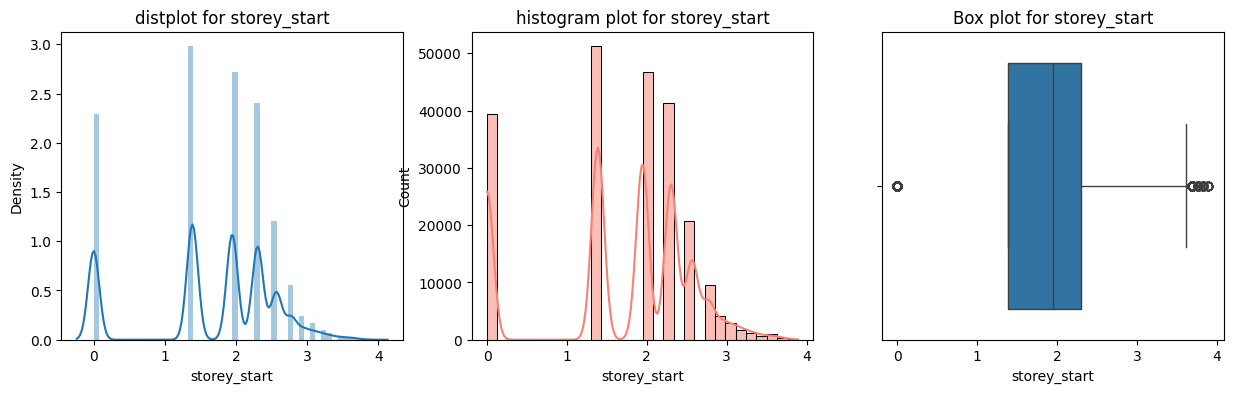

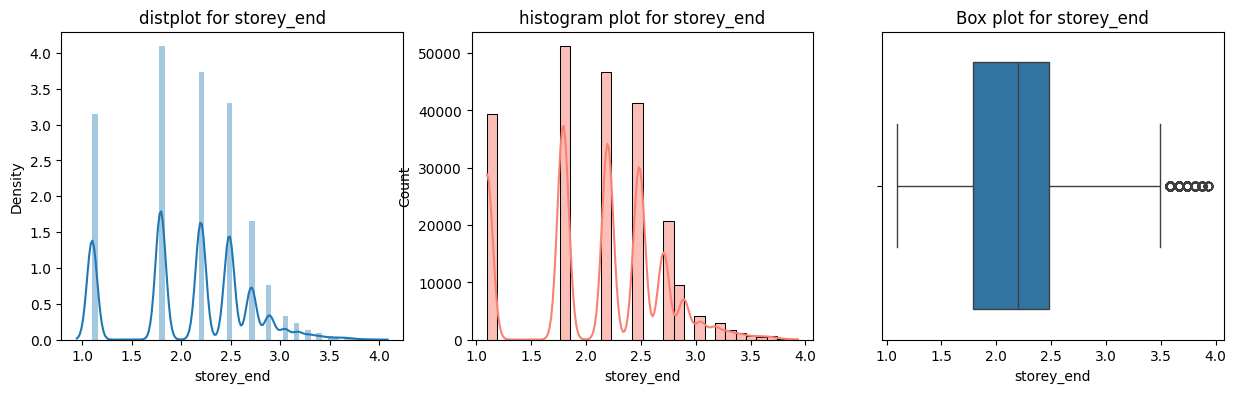

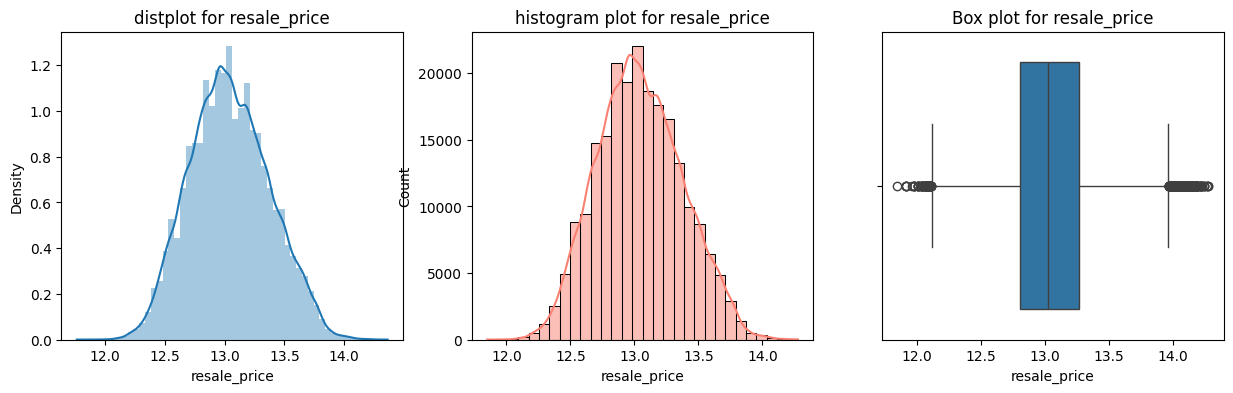

In [63]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df_final_3,i)

##Outliers Handling - Interquartile Range(IQR) Method

In [64]:
df_final_4= df_final_3.copy()

In [65]:
# The Outlier Columns are
# 1. floor_area_sqm
# 2. storey_start
# 3. sortey_end
# 4. resale_price
# Recorrect the Outliers

# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [66]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)

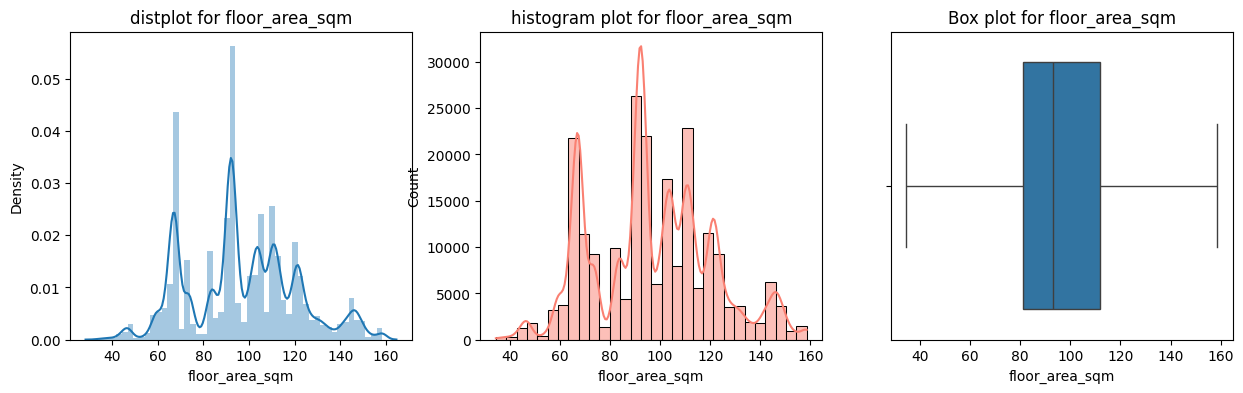

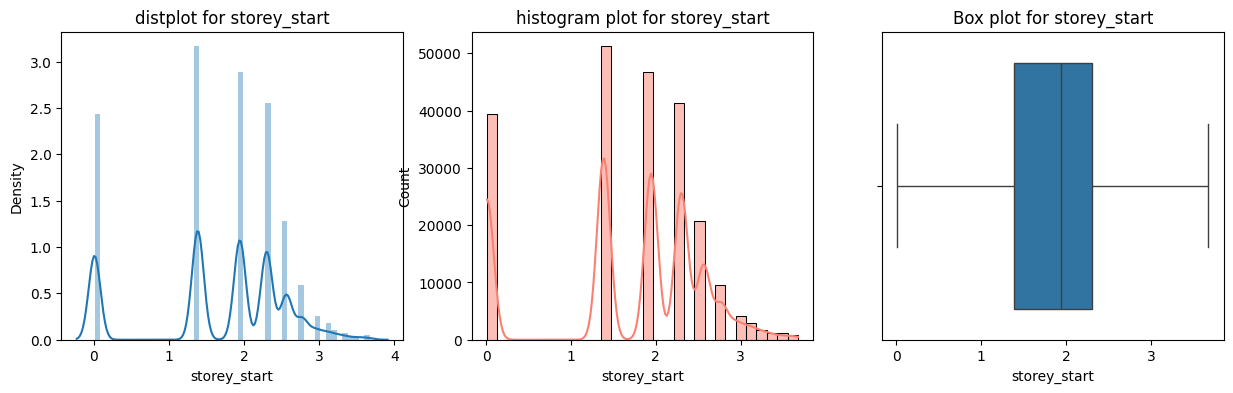

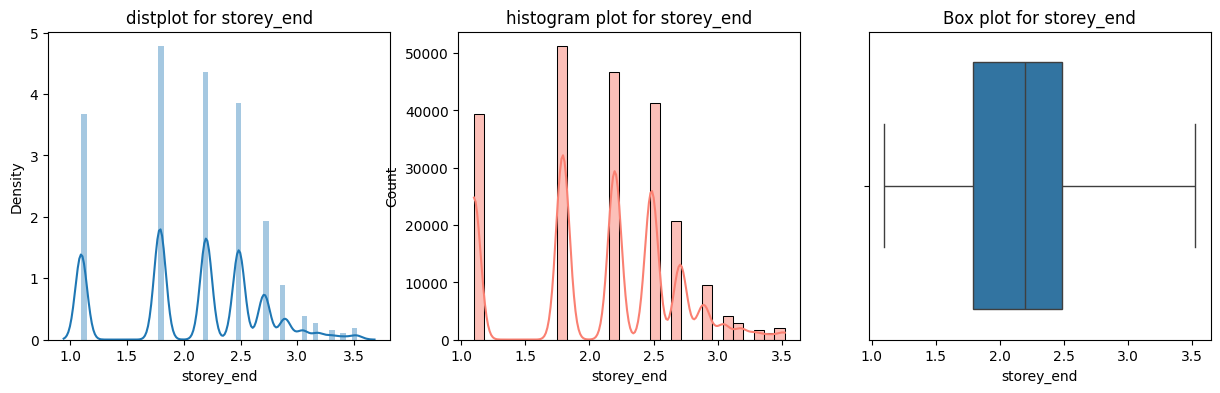

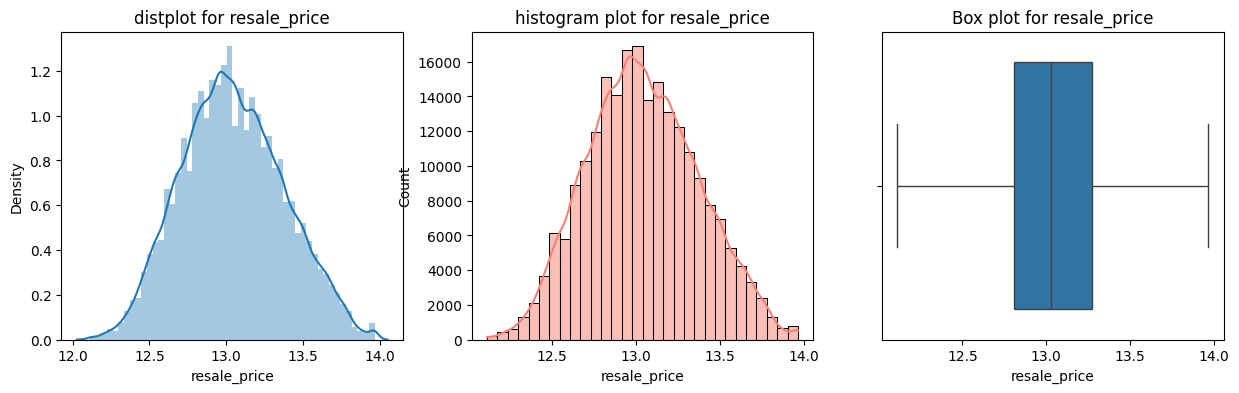

In [67]:
for k in outlier_columns:
    plot(df_final_4,k)

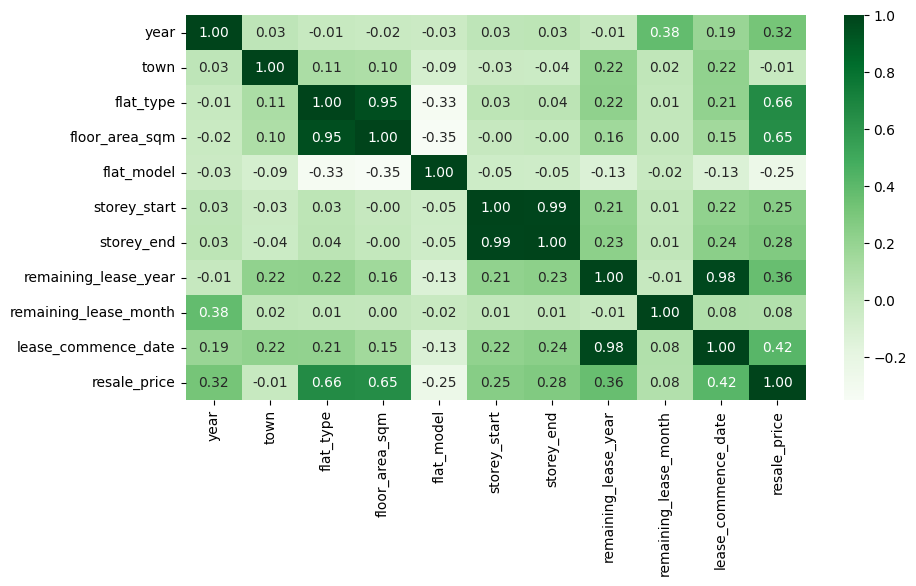

In [68]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(df_final_4.corr(), annot= True, cmap="Greens", fmt="0.2f")
plt.show()

###Model Selection (Regression)

In [69]:
df_final_5= df_final_4.copy()

In [70]:
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,220768.0,2019.665685,2.712664,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
town,220768.0,13.890029,7.956663,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,220768.0,3.120004,0.919474,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,220768.0,97.036081,23.828397,34.500000,81.000000,93.000000,112.000000,158.500000
flat_model,220768.0,8.689199,3.644488,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,220768.0,1.696029,0.920809,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,220768.0,2.093670,0.601277,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,220768.0,74.083776,13.505931,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,220768.0,4.612050,3.779514,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,220768.0,1995.182884,13.711887,1966.000000,1985.000000,1995.000000,2005.000000,2020.000000


In [71]:
np.exp(13.965480)

1161798.7399814494

In [72]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] >= 1161798]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
38448,2017,2,2,4.0,120.0,4.0,3227,40,42,93,7,2011,1180000.0
72746,2018,9,14,2.0,237.0,18.0,4889,1,3,52,10,1972,1185000.0
74209,2018,10,7,4.0,106.0,20.0,1943,40,42,91,3,2011,1168000.0
79804,2019,1,14,4.0,117.0,4.0,9268,37,39,90,11,2011,1185000.0
83922,2019,4,4,4.0,112.0,5.0,9591,34,36,95,10,2016,1200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220425,2024,7,18,3.0,97.0,14.0,9286,40,42,90,10,2016,1300000.0
220440,2024,7,18,4.0,104.0,13.0,9176,16,18,91,2,2016,1270000.0
220442,2024,7,18,4.0,133.0,8.0,1202,22,24,70,2,1995,1230000.0
220443,2024,7,18,4.0,125.0,5.0,8856,13,15,72,4,1997,1180000.0


In [73]:
np.exp(12.104561)

180694.13157722994

In [74]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] <= 180694]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
47067,2017,7,4,0.0,31.0,5.0,8085,4,6,56,8,1975,175000.0
62238,2018,4,10,1.0,42.0,17.0,6206,4,6,49,9,1969,180000.0
62989,2018,4,21,2.0,64.0,5.0,3558,13,15,59,2,1978,170000.0
64274,2018,5,15,1.0,42.0,5.0,1415,1,3,55,11,1975,180000.0
65495,2018,6,4,0.0,31.0,5.0,8085,1,3,55,10,1975,176000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120053,2020,11,4,1.0,42.0,17.0,5846,10,12,48,5,1970,180000.0
126747,2021,1,24,1.0,45.0,5.0,2345,7,9,64,5,1986,180000.0
127297,2021,2,4,0.0,31.0,5.0,8085,4,6,53,1,1975,180000.0
197149,2023,8,22,2.0,67.0,8.0,6378,7,9,91,3,2015,150000.0


In [75]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [76]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)

    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [78]:
select_model(df_final_5, LinearRegression)
select_model(df_final_5, DecisionTreeRegressor)
select_model(df_final_5, RandomForestRegressor)
select_model(df_final_5, AdaBoostRegressor)
select_model(df_final_5, ExtraTreesRegressor)
select_model(df_final_5, GradientBoostingRegressor)
select_model(df_final_5, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.676440212317098, 'Mean_squared_error': 0.03557396197483787, 'Root_mean_squared_error': 0.18861060939098276, 'Mean_absolute_error': 0.1476110901789792}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.6801987948001899, 'Mean_squared_error': 0.03576472310492317, 'Root_mean_squared_error': 0.18911563421600863, 'Mean_absolute_error': 0.14798777115875508}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9962373663805814, 'Mean_squared_error': 0.0004136848594845305, 'Root_mean_squared_error': 0.020339244319407014, 'Mean_absolute_error': 0.0072090524076468205}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9270402644794261, 'Mean_squared_error': 0.008159396200747343, 'Root_mean_squared_error': 0.09032937617822534, 'Mean_absolute_error': 0.06441470199741149}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9912127203237956, 'Mean_squared_error': 0.00

In [79]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= df_final_5.drop(columns=["resale_price"])
y= df_final_5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9552039839883193, 'Mean_squared_error': 0.005009728177417189, 'Root_mean_squared_error': 0.07077943329398159, 'Mean_absolute_error': 0.05182915142996627}


In [80]:
df_final_5.iloc[10456]

year                     2015.000000
town                        4.000000
flat_type                   2.000000
floor_area_sqm             74.000000
flat_model                  8.000000
storey_start                0.011858
storey_end                  1.098612
remaining_lease_year       68.000000
remaining_lease_month       0.000000
lease_commence_date      1985.000000
resale_price               12.815838
Name: 10456, dtype: float64

In [81]:
np.exp(12.815838)

367999.92008841544

In [82]:
user_data = np.array([[2015,4,2,74,8,0.011858,1.098612,68,0,1985]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

12.806090900413562

In [83]:
np.exp(12.806090900413562)

364430.4126520666

In [84]:
# Saving the Model unsing pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [85]:
import pickle
import numpy as np

In [86]:
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [87]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

12.25900157868113

In [88]:
np.exp(12.25900157868113)

210870.94255791442